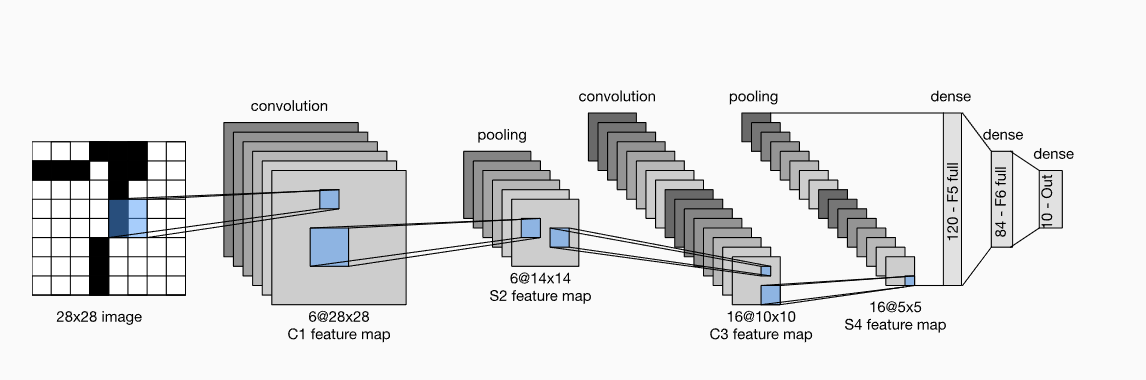

# **LeNet -5 Architecture**

- LeNet5 is one of the applications of the Convolution Neural Network. Yann LeCun developed it in 1989.
- LeNet5 is a network made up of 7 layers. It consists of 3 convolution layers, two subsampling layers, and two fully connected layers.

# **Importing Libraries**

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# ** Loading fashion-MNIST dataset from keras**

In [2]:
(train_images, y_train), (test_images, y_test) = fashion_mnist.load_data()

In [3]:
print('=================  Train Data ===================')
print(f'Grayscale train images data size :{train_images.shape}')
print(f'Grayscale train labels data size : {y_train.shape}')
print()
print('=================  Test Data ====================')
print(f'Grayscale test images data size  : {test_images.shape}')
print(f'Grayscale test labels data  size :{y_test.shape}')

=================  Train Data ===================
Grayscale train images data size :(60000, 28, 28)
Grayscale train labels data size : (60000,)

=================  Test Data ====================
Grayscale test images data size  : (10000, 28, 28)
Grayscale test labels data  size :(10000,)


In [4]:
label_name = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt','Sneaker','Bag','AnkleBoot']
num_classes = len(label_name)
num_classes

10

# **Normalization**

In [5]:
x_train =train_images/255.0
x_test = test_images/255.0

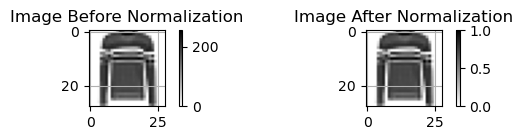

In [6]:
plt.figure(figsize=(6,1.5))
plt.subplot(1,2,1)
plt.imshow(train_images[5], cmap =plt.cm.binary)
plt.colorbar()
plt.grid(True)
plt.title('Image Before Normalization')

plt.subplot(1,2,2)
plt.imshow(x_train[5], cmap =plt.cm.binary)
plt.colorbar()
plt.grid(True)
plt.title('Image After Normalization')
plt.tight_layout()
plt.show()

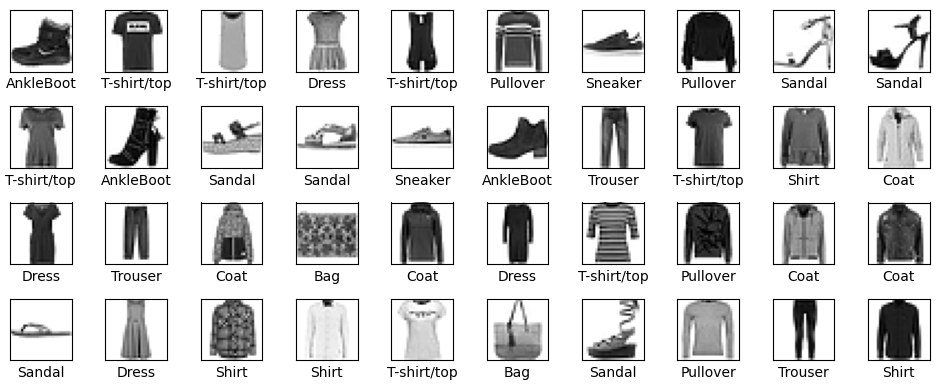

In [7]:
# Visualising array of pictures
plt.figure(figsize=(10,4))
for i in range(40):
  plt.subplot(4,10,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(train_images[i],cmap =plt.cm.binary)
  plt.xlabel(label_name[y_train[i]])
  plt.tight_layout()
plt.show()

In [8]:
! pip install visualkeras
import visualkeras

In [9]:
def plot_example(X, y, y_pred=None):
    plt.figure(figsize=(20,10))
    fig, axes = plt.subplots(3, 5)
    fig.subplots_adjust(hspace=0.3, wspace=0.5)

    X, y = X[:15, ..., 0], y[:15]

    for i, ax in enumerate(axes.flat):
        ax.imshow(X[i],  cmap =plt.cm.binary)
        #----------------------------------------------
        # Show true and predicted classes.
        if y_pred is None:
            xlabel = f"True: {y[i]}"
        else:
            xlabel = f"True: {label_name[y[i]]},\nPred: {label_name[y_pred[i]]}"
        #-----------------------------------------------
        ax.set_xlabel(xlabel)
    plt.show()
def plot_example_errors(X, y, y_pred):
    incorrect = (y != y_pred)

    X = X[incorrect]
    y = y[incorrect]
    y_pred = y_pred[incorrect]
    plot_example(X, y, y_pred)

## **Reshaping**

In [10]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# **LeNet-5 : (with activation function: 'tanh')**
<img src='https://files.codingninjas.in/article_images/lenet-5-cnn-architecture-9-1675824241.webp'>

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 6)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 4, 4, 16)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 120)               3

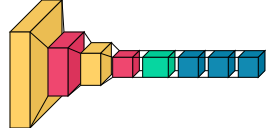

In [11]:
LeNet5  = Sequential([
    Conv2D(6, kernel_size=(5,5),  strides=1, padding='valid', activation='tanh', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'),
    Conv2D(16, kernel_size=(5,5), strides=1, padding='valid', activation='tanh'),
    MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'),
    Flatten(),
    Dense(120, activation='tanh'),
    Dense(84, activation='tanh'),
    Dense(num_classes, activation='softmax')
])

# summary
LeNet5.summary()
print('  ','\nLeNet-5 Architecture with tanh activation Function\n')
visualkeras.layered_view(LeNet5)

In [12]:
optimizer = 'adam'
loss = 'sparse_categorical_crossentropy'
metrics = ['accuracy']
LeNet5.compile(loss=loss, optimizer=optimizer,  metrics=metrics)

In [13]:
LeNet5.fit(x_train, y_train, epochs = 20, batch_size= 64, validation_data= (x_test, y_test))

Epoch 1/20
938/938 [==============================] - 17s 17ms/step - loss: 0.5162 - accuracy: 0.8134 - val_loss: 0.4199 - val_accuracy: 0.8449
Epoch 2/20
938/938 [==============================] - 15s 16ms/step - loss: 0.3632 - accuracy: 0.8665 - val_loss: 0.3619 - val_accuracy: 0.8674
Epoch 3/20
938/938 [==============================] - 14s 15ms/step - loss: 0.3239 - accuracy: 0.8806 - val_loss: 0.3363 - val_accuracy: 0.8760
Epoch 4/20
938/938 [==============================] - 14s 15ms/step - loss: 0.2995 - accuracy: 0.8896 - val_loss: 0.3345 - val_accuracy: 0.8782
Epoch 5/20
938/938 [==============================] - 15s 16ms/step - loss: 0.2788 - accuracy: 0.8977 - val_loss: 0.3098 - val_accuracy: 0.8874
Epoch 6/20
938/938 [==============================] - 16s 17ms/step - loss: 0.2634 - accuracy: 0.9023 - val_loss: 0.3203 - val_accuracy: 0.8859
Epoch 7/20
938/938 [==============================] - 15s 16ms/step - loss: 0.2481 - accuracy: 0.9080 - val_loss: 0.3120 - val_accuracy:

<Figure size 300x200 with 0 Axes>

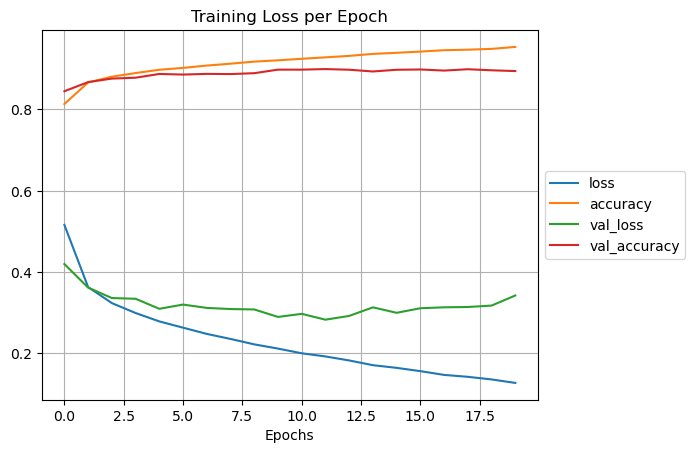

In [14]:
history_LeNet = pd.DataFrame(LeNet5.history.history)
plt.figure(figsize=(3, 2))
history_LeNet.plot()
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('')
plt.title(f'Training Loss per Epoch')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [15]:
predictions = LeNet5.predict(x_test)
y_pred = np.argmax(predictions, axis=1)
print(f'Test set error rate: {np.mean(y_pred == y_test)}')


313/313 [==============================] - 2s 6ms/step
Test set error rate: 0.8945


     Some correct classification:


<Figure size 2000x1000 with 0 Axes>

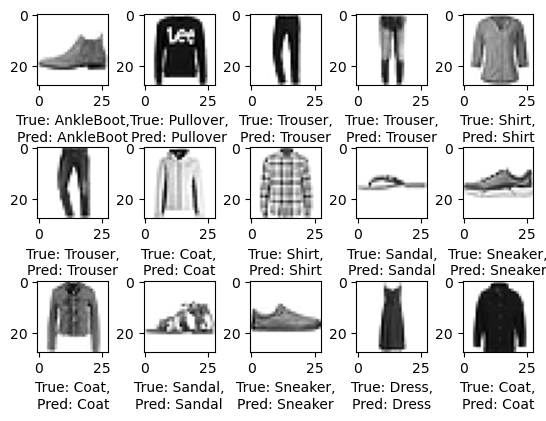

    Some incorrect classification:


<Figure size 2000x1000 with 0 Axes>

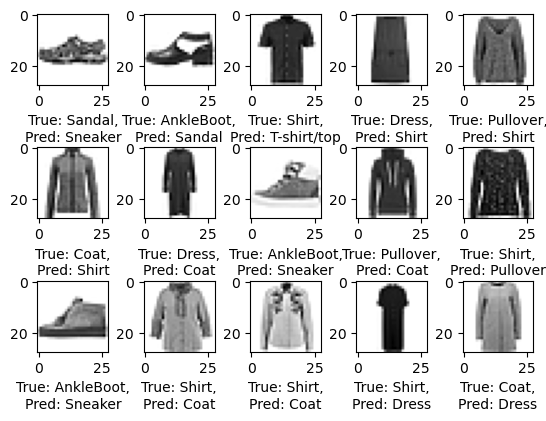

In [16]:
# Plot some examples with model predictions.
print("========"*10)
print('     Some correct classification:')
print("========"*10)
plot_example(x_test, y_test, y_pred)
print("========"*10)
print('    Some incorrect classification:')
print("========"*10)
plot_example_errors(x_test, y_test, y_pred)

# **LeNet-5 (With activation function= 'ReLu')**

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 24, 24, 6)         156       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 12, 12, 6)         0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 4, 4, 16)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 120)              

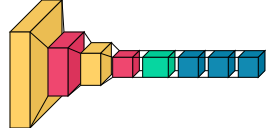

In [17]:
LeNet5_mod  = Sequential([
    Conv2D(6, kernel_size=(5,5),  strides=1, padding='valid', activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'),
    Conv2D(16, kernel_size=(5,5), strides=1, padding='valid', activation='relu'),
    MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'),
    Flatten(),
    Dense(120, activation='relu'),
    Dense(84, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# summary
LeNet5_mod.summary()
print('  ','\nLeNet-5 Architecture with Relu activation Function\n')
visualkeras.layered_view(LeNet5_mod)

In [18]:
optimizer = 'adam'
loss = 'sparse_categorical_crossentropy'
metrics = ['accuracy']
LeNet5_mod.compile(loss=loss, optimizer=optimizer,  metrics=metrics)

In [19]:
LeNet5_mod.fit(x_train, y_train, epochs = 20, batch_size= 64, validation_data= (x_test, y_test))

Epoch 1/20
938/938 [==============================] - 17s 17ms/step - loss: 0.5991 - accuracy: 0.7800 - val_loss: 0.4391 - val_accuracy: 0.8441
Epoch 2/20
938/938 [==============================] - 16s 17ms/step - loss: 0.3896 - accuracy: 0.8591 - val_loss: 0.3818 - val_accuracy: 0.8583
Epoch 3/20
938/938 [==============================] - 15s 16ms/step - loss: 0.3412 - accuracy: 0.8755 - val_loss: 0.3607 - val_accuracy: 0.8686
Epoch 4/20
938/938 [==============================] - 16s 17ms/step - loss: 0.3096 - accuracy: 0.8852 - val_loss: 0.3282 - val_accuracy: 0.8783
Epoch 5/20
938/938 [==============================] - 19s 20ms/step - loss: 0.2912 - accuracy: 0.8915 - val_loss: 0.3207 - val_accuracy: 0.8844
Epoch 6/20
938/938 [==============================] - 14s 15ms/step - loss: 0.2763 - accuracy: 0.8969 - val_loss: 0.3193 - val_accuracy: 0.8838
Epoch 7/20
938/938 [==============================] - 15s 16ms/step - loss: 0.2610 - accuracy: 0.9036 - val_loss: 0.2919 - val_accuracy:

<Figure size 300x200 with 0 Axes>

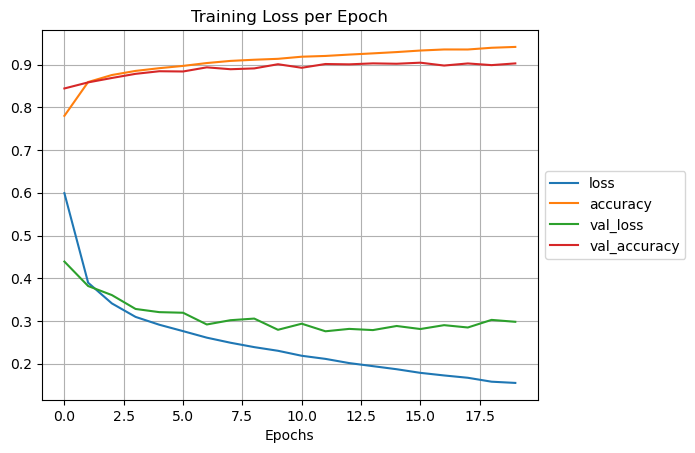

In [20]:
history_LeNet5_mod = pd.DataFrame(LeNet5_mod.history.history)
plt.figure(figsize=(3, 2))
history_LeNet5_mod.plot()
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('')
plt.title(f'Training Loss per Epoch')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [21]:
predictions = LeNet5_mod.predict(x_test)
y_pred1 = np.argmax(predictions, axis=1)
print(f'Test set error rate: {np.mean(y_pred1 == y_test)}')

313/313 [==============================] - 3s 9ms/step
Test set error rate: 0.9027


     Some correct classification:


<Figure size 2000x1000 with 0 Axes>

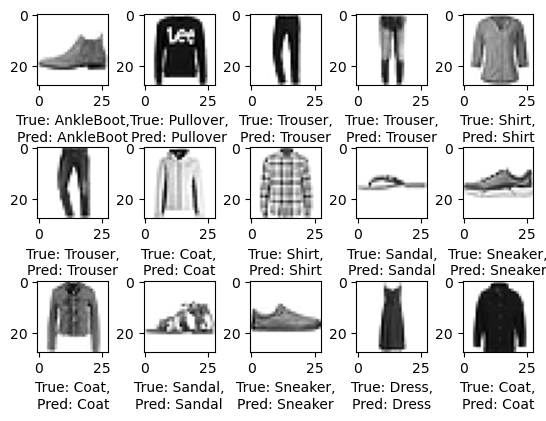

    Some incorrect classification:


<Figure size 2000x1000 with 0 Axes>

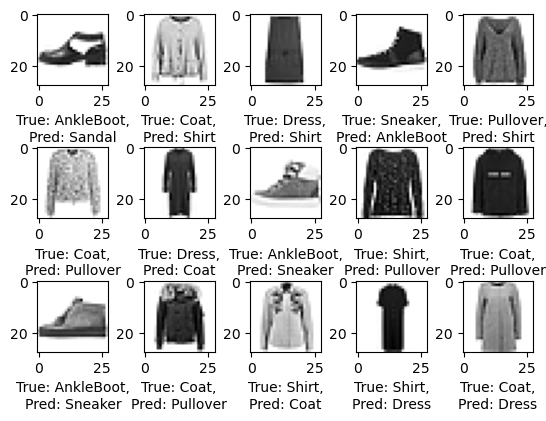

In [22]:
# Plot some examples with model predictions.
print("========"*10)
print('     Some correct classification:')
print("========"*10)
plot_example(x_test, y_test, y_pred1)
print("========"*10)
print('    Some incorrect classification:')
print("========"*10)
plot_example_errors(x_test, y_test, y_pred1)

# LeNet-5 (With activation function= 'ReLu' and Dropout Layer)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 24, 24, 6)         156       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 12, 12, 6)         0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 12, 12, 6)         0         
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 4, 4, 16)          0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 4, 4, 16)         

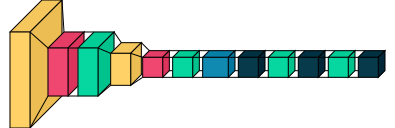

In [23]:
LeNet5_mod1  = Sequential([
    Conv2D(6, kernel_size=(5,5),  strides=1, padding='valid', activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'),
    Dropout(0.2),
    Conv2D(16, kernel_size=(5,5), strides=1, padding='valid', activation='relu'),
    MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'),
    Dropout(0.2),
    Flatten(),
    Dense(120, activation='relu'),
    Dropout(0.2),
    Dense(84, activation='relu'),
    Dropout(0.2),
    Dense(num_classes, activation='softmax')
])

# summary
LeNet5_mod1.summary()
print('  ','\nLeNet-5 Architecture with Relu activation Function\n')
visualkeras.layered_view(LeNet5_mod1)

In [24]:
LeNet5_mod1.compile(loss=loss, optimizer=optimizer,  metrics=metrics)
LeNet5_mod1.fit(x_train, y_train, epochs = 30, batch_size= 64, validation_data= (x_test, y_test))

Epoch 1/30
938/938 [==============================] - 24s 23ms/step - loss: 0.7677 - accuracy: 0.7151 - val_loss: 0.5145 - val_accuracy: 0.8067
Epoch 2/30
938/938 [==============================] - 21s 22ms/step - loss: 0.5299 - accuracy: 0.8045 - val_loss: 0.4474 - val_accuracy: 0.8317
Epoch 3/30
938/938 [==============================] - 19s 21ms/step - loss: 0.4694 - accuracy: 0.8277 - val_loss: 0.3970 - val_accuracy: 0.8541
Epoch 4/30
938/938 [==============================] - 19s 21ms/step - loss: 0.4366 - accuracy: 0.8402 - val_loss: 0.3749 - val_accuracy: 0.8651
Epoch 5/30
938/938 [==============================] - 20s 21ms/step - loss: 0.4106 - accuracy: 0.8503 - val_loss: 0.3526 - val_accuracy: 0.8733
Epoch 6/30
938/938 [==============================] - 19s 20ms/step - loss: 0.3938 - accuracy: 0.8543 - val_loss: 0.3404 - val_accuracy: 0.8762
Epoch 7/30
938/938 [==============================] - 21s 23ms/step - loss: 0.3801 - accuracy: 0.8611 - val_loss: 0.3391 - val_accuracy:

<Figure size 300x200 with 0 Axes>

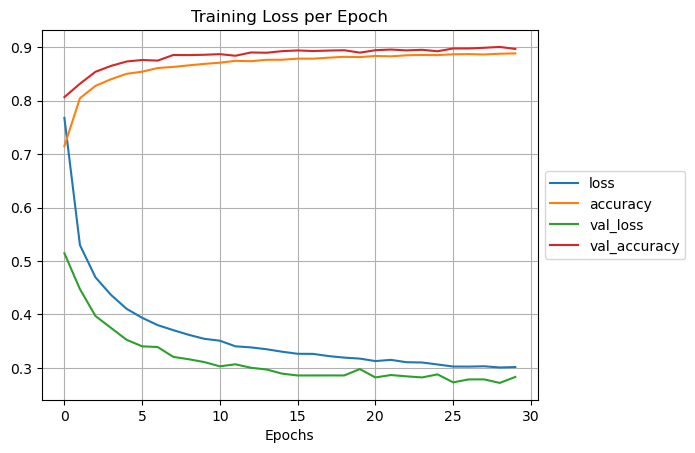

In [25]:
history_LeNet5_mod1 = pd.DataFrame(LeNet5_mod1.history.history)
plt.figure(figsize=(3, 2))
history_LeNet5_mod1.plot()
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('')
plt.title(f'Training Loss per Epoch')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [26]:
predictions = LeNet5_mod1.predict(x_test)
y_pred2 = np.argmax(predictions, axis=1)
print(f'Test set error rate: {np.mean(y_pred2 == y_test)}')

313/313 [==============================] - 6s 15ms/step
Test set error rate: 0.8968


     Some correct classification:


<Figure size 2000x1000 with 0 Axes>

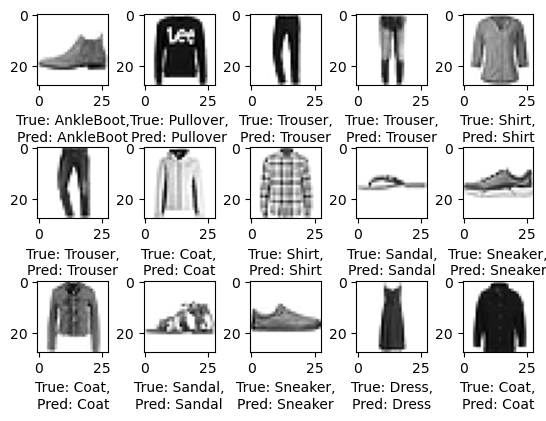

    Some incorrect classification:


<Figure size 2000x1000 with 0 Axes>

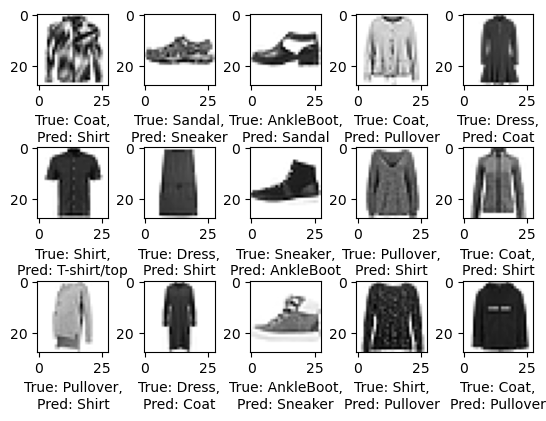

In [27]:
# Plot some examples with model predictions.
print("========"*10)
print('     Some correct classification:')
print("========"*10)
plot_example(x_test, y_test, y_pred2)
print("========"*10)
print('    Some incorrect classification:')
print("========"*10)
plot_example_errors(x_test, y_test, y_pred2)